___________________________
Practice and notes from online course: 
[Python for Financial Analysis and Algorithmic Trading](https://www.udemy.com/python-for-finance-and-trading-algorithms/learn/v4/content) <br>
Comments are just out of my understanding, mostly
# A start of Quantopian finance analysis # 
notebook & algorithms
____________________________
#### get_pricing, symbol #### 
#### Quantopian Pipeline (Data, Factors, Fliters and Screens, Masking, Classifiers)
#### Pairs trading, z-score, backtesting ####
#### Another example in IDE: simple Bollinger Bands
The first part run on quantopian notebook; <br>
The second part run on quantopian algorithm IDE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# NO NEED TO DO MAGIC INLINE COMMAND ON QUANTOPIAN!

### get_pricing ### 
`get_pricing` provides 12 years of US equity price data. Same data used for quantopian backtester

In [2]:
mcdon = get_pricing('MCD', start_date='2017-01-01', end_date = '2017-02-01', 
                    frequency='minute')
mcdon.head()

,open_price,high,low,close_price,volume,price
2017-01-03 14:31:00+00:00,121.86,121.86,121.57,121.63,123665.0,121.63
2017-01-03 14:32:00+00:00,121.73,121.92,121.41,121.45,13536.0,121.45
2017-01-03 14:33:00+00:00,121.45,121.79,121.45,121.52,17562.0,121.52
2017-01-03 14:34:00+00:00,121.45,121.80,121.44,121.75,12072.0,121.75
2017-01-03 14:35:00+00:00,121.74,122.00,121.66,121.99,8100.0,121.99


In [3]:
mcdon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2017-01-03 14:31:00+00:00 to 2017-02-01 21:00:00+00:00
Data columns (total 6 columns):
open_price     8188 non-null float64
high           8188 non-null float64
low            8188 non-null float64
close_price    8188 non-null float64
volume         8190 non-null float64
price          8190 non-null float64
dtypes: float64(6)
memory usage: 447.9 KB


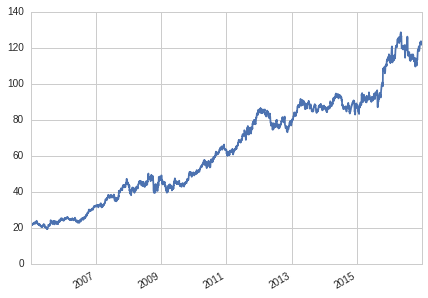

In [5]:
mcdon = get_pricing('MCD', start_date='2005-01-01', 
                    end_date = '2017-01-01', 
                    frequency='daily')
mcdon['close_price'].plot(figsize=(7,5))

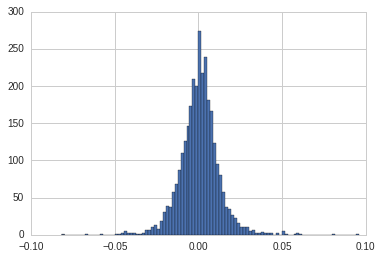

In [7]:
mcdon['close_price'].pct_change(1).hist(bins=100, figsize=(6,4));

###symbols()###

In [8]:
symbols('MCD', symbol_reference_date='2010-01-01')

Equity(4707 [MCD])

In [9]:
mcdon_info = symbols('MCD', symbol_reference_date='2010-01-01')

In [10]:
print(type(mcdon_info))

<type 'zipline.assets._assets.Equity'>


In [11]:
print(mcdon_info)

Equity(4707 [MCD])


In [14]:
mcdon_info.to_dict()

{'asset_name': u'MCDONALDS CORP',
 'auto_close_date': Timestamp('2018-09-19 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2018-09-14 00:00:00+0000', tz='UTC'),
 'exchange': u'NYSE',
 'exchange_full': u'NEW YORK STOCK EXCHANGE',
 'exchange_info': ExchangeInfo(u'NEW YORK STOCK EXCHANGE', u'NYSE', u'US'),
 'first_traded': None,
 'multiplier': 1.0,
 'sid': 4707,
 'start_date': Timestamp('2002-01-01 00:00:00+0000', tz='UTC'),
 'symbol': u'MCD',
 'tick_size': 0.01}

# Pipeline

In [60]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.factors import BollingerBands, SimpleMovingAverage, EWMA
from quantopian.pipeline.data import morningstar        # for classifier
from quantopian.pipeline.classifiers.morningstar import Sector

In [61]:
result = run_pipeline(Pipeline(), '2017-01-01', '2017-01-01')

In [62]:
result.head(10)

Empty DataFrame
Columns: []
Index: [(2017-01-03 00:00:00+00:00, Equity(2 [ARNC])), (2017-01-03 00:00:00+00:00, Equity(21 [AAME])), (2017-01-03 00:00:00+00:00, Equity(24 [AAPL])), (2017-01-03 00:00:00+00:00, Equity(25 [ARNC_PR])), (2017-01-03 00:00:00+00:00, Equity(31 [ABAX])), (2017-01-03 00:00:00+00:00, Equity(39 [DDC])), (2017-01-03 00:00:00+00:00, Equity(41 [ARCB])), (2017-01-03 00:00:00+00:00, Equity(52 [ABM])), (2017-01-03 00:00:00+00:00, Equity(53 [ABMD])), (2017-01-03 00:00:00+00:00, Equity(62 [ABT]))]

In [63]:
result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8348 entries, (2017-01-03 00:00:00+00:00, Equity(2 [ARNC])) to (2017-01-03 00:00:00+00:00, Equity(50569 [OUSM]))
Empty DataFrame

## Factors

Factors take in an asset and a timestamp and return some numerical value.

In [68]:
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=30)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=10)
    latest_close = USEquityPricing.close.latest
    
    percent_difference = (mean_close_10 - mean_close_30) / mean_close_30
    
    return Pipeline(columns = {
        'Percent Diff':percent_difference,
        '30 Day Mean Close':mean_close_30,
        'Latest Close':latest_close
    })

In [69]:
result = run_pipeline(make_pipeline(), '2017-01-01', '2017-01-01')

In [70]:
result.head()

30 Day Mean Close  \
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])              20.110500   
                          Equity(21 [AAME])              3.899241   
                          Equity(24 [AAPL])            113.368433   
                          Equity(25 [ARNC_PR])          86.796111   
                          Equity(31 [ABAX])             52.498394   

                                                Latest Close  Percent Diff  
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])             18.55     -0.022749  
                          Equity(21 [AAME])             4.10     -0.005499  
                          Equity(24 [AAPL])           115.84      0.028481  
                          Equity(25 [ARNC_PR])           NaN     -0.000474  
                          Equity(31 [ABAX])            52.74     -0.007665

# Filters and Screens

Filters take in an asset and a timestamp and return a boolean

In [73]:
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=30)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=10)
    latest_close = USEquityPricing.close.latest
    
    percent_difference = (mean_close_10 - mean_close_30) / mean_close_30
    
    perc_diff_check = percent_difference > 0
    
    return Pipeline(columns = {
        'Percent Diff':percent_difference,
        '30 Day Mean Close':mean_close_30,
        'Latest Close':latest_close,
        'Positive Percent Diff':perc_diff_check
    })

In [75]:
result = run_pipeline(make_pipeline(), '2017-01-01', '2017-01-01')
result.head()

30 Day Mean Close  \
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])              20.110500   
                          Equity(21 [AAME])              3.899241   
                          Equity(24 [AAPL])            113.368433   
                          Equity(25 [ARNC_PR])          86.796111   
                          Equity(31 [ABAX])             52.498394   

                                                Latest Close  Percent Diff  \
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])             18.55     -0.022749   
                          Equity(21 [AAME])             4.10     -0.005499   
                          Equity(24 [AAPL])           115.84      0.028481   
                          Equity(25 [ARNC_PR])           NaN     -0.000474   
                          Equity(31 [ABAX])            52.74     -0.007665   

                                               Positive Percent Diff  
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])                     False  
                          Equity(21 [AAME])                    False  
                          Equity(24 [AAPL])                     True  
                          Equity(25 [ARNC_PR])                 False  
                          Equity(31 [ABAX])                    False

In [76]:
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=30)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=10)
    latest_close = USEquityPricing.close.latest
    
    percent_difference = (mean_close_10 - mean_close_30) / mean_close_30
    
    perc_diff_check = percent_difference > 0
    
    return Pipeline(columns = {
        'Percent Diff':percent_difference,
        '30 Day Mean Close':mean_close_30,
        'Latest Close':latest_close,
        'Positive Percent Diff':perc_diff_check
    }, screen=perc_diff_check)

In [77]:
result = run_pipeline(make_pipeline(), '2017-01-01', '2017-01-01')
result.head()

30 Day Mean Close  Latest Close  \
2017-01-03 00:00:00+00:00 Equity(24 [AAPL])         113.368433        115.84   
                          Equity(66 [AB])            23.119167         23.45   
                          Equity(69 [ACAT])          15.839500         15.02   
                          Equity(70 [VBF])           18.208480         18.49   
                          Equity(84 [ACET])          20.722753         21.97   

                                             Percent Diff  \
2017-01-03 00:00:00+00:00 Equity(24 [AAPL])      0.028481   
                          Equity(66 [AB])        0.004578   
                          Equity(69 [ACAT])      0.009375   
                          Equity(70 [VBF])       0.011814   
                          Equity(84 [ACET])      0.039630   

                                            Positive Percent Diff  
2017-01-03 00:00:00+00:00 Equity(24 [AAPL])                  True  
                          Equity(66 [AB])                    True  
                          Equity(69 [ACAT])                  True  
                          Equity(70 [VBF])                   True  
                          Equity(84 [ACET])                  True

### Reverse a screen

In [79]:
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=30)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=10)
    latest_close = USEquityPricing.close.latest
    
    percent_difference = (mean_close_10 - mean_close_30) / mean_close_30
    
    perc_diff_check = percent_difference > 0
    
    return Pipeline(columns = {
        'Percent Diff':percent_difference,
        '30 Day Mean Close':mean_close_30,
        'Latest Close':latest_close,
        'Positive Percent Diff':perc_diff_check
    }, screen=~perc_diff_check)

In [80]:
result = run_pipeline(make_pipeline(), '2017-01-01', '2017-01-01')
result.head()

30 Day Mean Close  \
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])              20.110500   
                          Equity(21 [AAME])              3.899241   
                          Equity(25 [ARNC_PR])          86.796111   
                          Equity(31 [ABAX])             52.498394   
                          Equity(39 [DDC])               9.523000   

                                                Latest Close  Percent Diff  \
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])             18.55     -0.022749   
                          Equity(21 [AAME])             4.10     -0.005499   
                          Equity(25 [ARNC_PR])           NaN     -0.000474   
                          Equity(31 [ABAX])            52.74     -0.007665   
                          Equity(39 [DDC])              9.69     -0.015436   

                                               Positive Percent Diff  
2017-01-03 00:00:00+00:00 Equity(2 [ARNC])                     False  
                          Equity(21 [AAME])                    False  
                          Equity(25 [ARNC_PR])                 False  
                          Equity(31 [ABAX])                    False  
                          Equity(39 [DDC])                     False

## Combine Filters

In [83]:
def make_pipeline():
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=30)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=10)
    latest_close = USEquityPricing.close.latest
    
    percent_difference = (mean_close_10 - mean_close_30) / mean_close_30
    
    perc_diff_check = percent_difference > 0
    small_price = latest_close < 5
    final_filter = perc_diff_check & small_price
    
    return Pipeline(columns = {
        'Percent Diff':percent_difference,
        '30 Day Mean Close':mean_close_30,
        'Latest Close':latest_close,
        'Positive Percent Diff':perc_diff_check
    }, screen=final_filter)

In [84]:
result = run_pipeline(make_pipeline(), '2017-01-01', '2017-01-01')
result.head()

30 Day Mean Close  Latest Close  \
2017-01-03 00:00:00+00:00 Equity(535 [ARTW])           3.097778          3.40   
                          Equity(677 [AXAS])           2.265333          2.56   
                          Equity(1144 [BTX])           3.531167          3.62   
                          Equity(1323 [CAW])           2.541333          2.60   
                          Equity(1546 [CIF])           2.500370          2.57   

                                              Percent Diff  \
2017-01-03 00:00:00+00:00 Equity(535 [ARTW])      0.013271   
                          Equity(677 [AXAS])      0.145527   
                          Equity(1144 [BTX])      0.065795   
                          Equity(1323 [CAW])      0.016002   
                          Equity(1546 [CIF])      0.015579   

                                             Positive Percent Diff  
2017-01-03 00:00:00+00:00 Equity(535 [ARTW])                  True  
                          Equity(677 [AXAS])                  True  
                          Equity(1144 [BTX])                  True  
                          Equity(1323 [CAW])                  True  
                          Equity(1546 [CIF])                  True

# Masking

To ignore certain assets when computing pipeline expresssions. There are two common cases where ignoring assets is useful:
* To compute an expression that's computationally expensive, and we only care about certain assets.
* To compute an expression that performs comparisons between assets, but we only want those comparisons, not assets. 

In [85]:
def make_pipeline():
    latest_close = USEquityPricing.close.latest
    small_price = latest_close < 5
    
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=30, mask=small_price)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=10, mask=small_price)
    
    percent_difference = (mean_close_10 - mean_close_30) / mean_close_30
    
    perc_diff_check = percent_difference > 0
    final_filter = perc_diff_check & small_price
    
    return Pipeline(columns = {
        'Percent Diff':percent_difference,
        '30 Day Mean Close':mean_close_30,
        'Latest Close':latest_close,
        'Positive Percent Diff':perc_diff_check
    }, screen=final_filter)

In [86]:
result = run_pipeline(make_pipeline(), '2017-01-01', '2017-01-01')
result.head()

30 Day Mean Close  Latest Close  \
2017-01-03 00:00:00+00:00 Equity(535 [ARTW])           3.097778          3.40   
                          Equity(677 [AXAS])           2.265333          2.56   
                          Equity(1144 [BTX])           3.531167          3.62   
                          Equity(1323 [CAW])           2.541333          2.60   
                          Equity(1546 [CIF])           2.500370          2.57   

                                              Percent Diff  \
2017-01-03 00:00:00+00:00 Equity(535 [ARTW])      0.013271   
                          Equity(677 [AXAS])      0.145527   
                          Equity(1144 [BTX])      0.065795   
                          Equity(1323 [CAW])      0.016002   
                          Equity(1546 [CIF])      0.015579   

                                             Positive Percent Diff  
2017-01-03 00:00:00+00:00 Equity(535 [ARTW])                  True  
                          Equity(677 [AXAS])                  True  
                          Equity(1144 [BTX])                  True  
                          Equity(1323 [CAW])                  True  
                          Equity(1546 [CIF])                  True

# Classifiers
### Classifier Methods

* eq (equals)
* isnull
* startswith

In [87]:
exchange = morningstar.share_class_reference.exchange_id.latest
exchange

Latest([share_class_reference.exchange_id], 1)

In [89]:
nyse_filter = exchange.eq('NYS')
nyse_filter

ArrayPredicate([Latest(...)], 0)

In [90]:
def make_pipeline():
    latest_close = USEquityPricing.close.latest
    small_price = latest_close < 5
    
    nyse_filter = exchange.eq('NYS')
    
    mean_close_30 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=30, mask=small_price)
    mean_close_10 = SimpleMovingAverage(inputs=[USEquityPricing.close], window_length=10, mask=small_price)
    
    percent_difference = (mean_close_10 - mean_close_30) / mean_close_30
    
    perc_diff_check = percent_difference > 0
    final_filter = perc_diff_check & nyse_filter
    
    return Pipeline(columns = {
        'Percent Diff':percent_difference,
        '30 Day Mean Close':mean_close_30,
        'Latest Close':latest_close,
        'Positive Percent Diff':perc_diff_check
    }, screen=final_filter)

In [91]:
result = run_pipeline(make_pipeline(), '2017-01-01', '2017-01-01')
result.head()

30 Day Mean Close  Latest Close  \
2017-01-03 00:00:00+00:00 Equity(2586 [EQS])           1.960533         2.020   
                          Equity(3265 [GLF])           1.576367         1.725   
                          Equity(3645 [HOV])           2.406667         2.735   
                          Equity(4577 [LUB])           4.292333         4.270   
                          Equity(4971 [RT])            3.244000         3.240   

                                              Percent Diff  \
2017-01-03 00:00:00+00:00 Equity(2586 [EQS])      0.022120   
                          Equity(3265 [GLF])      0.162420   
                          Equity(3645 [HOV])      0.176939   
                          Equity(4577 [LUB])      0.004116   
                          Equity(4971 [RT])       0.009094   

                                             Positive Percent Diff  
2017-01-03 00:00:00+00:00 Equity(2586 [EQS])                  True  
                          Equity(3265 [GLF])                  True  
                          Equity(3645 [HOV])                  True  
                          Equity(4577 [LUB])                  True  
                          Equity(4971 [RT])                   True

In [92]:
len(result)

66

____
# Pairs Traiding Algorithm

In [17]:
start = '2015-01-01'
end = '2017-01-01'
united = get_pricing('UAL', start_date=start, end_date=end)
american = get_pricing('AAL', start_date=start, end_date=end)

In [20]:
american.head(3)

,open_price,high,low,close_price,volume,price
2015-01-02 00:00:00+00:00,53.222,53.536,52.036,52.859,9507330.0,52.859
2015-01-05 00:00:00+00:00,53.310,53.477,52.301,52.830,10401276.0,52.830
2015-01-06 00:00:00+00:00,53.212,53.369,51.114,52.006,12491282.0,52.006


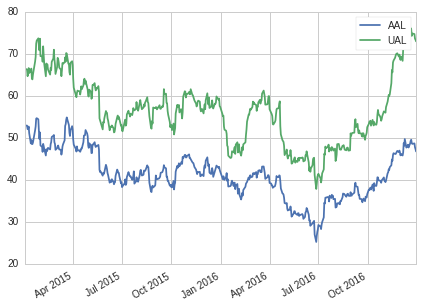

In [24]:
american['close_price'].plot(label='AAL',figsize=(7,5))
united['close_price'].plot(label='UAL')
plt.legend();

## Correlation, using np.corrcoef ##

In [25]:
np.corrcoef(american['close_price'], united['close_price'])

array([[ 1.        ,  0.92333958],
       [ 0.92333958,  1.        ]])

## Varify pandas covariance data for Correlation calculation: good agreement ##

In [34]:
close_df = pd.concat([american['close_price'], united['close_price']], axis=1)
close_df.columns = ['aa','ua']
covar = close_df.cov()
print(covar)

           aa         ua
aa  32.546323  42.224625
ua  42.224625  64.254976


In [41]:
covar.loc['ua','aa']/np.sqrt(covar.loc['aa','aa']*covar.loc['ua','ua'])

0.92333958351350753

# Spread, and it's z-score #
z-score = (X - X.mean())/X.std() , in finace statistics

In [42]:
spread = american['close_price'] - united['close_price']

In [43]:
def zscore(spread):
    return (spread - spread.mean())/spread.std()

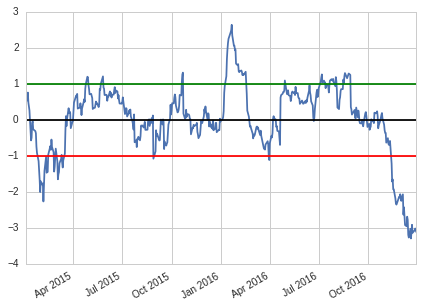

In [45]:
zscore(spread).plot(figsize = (7,5))
plt.axhline(zscore(spread).mean(), c='k')
plt.axhline(1, c='g')
plt.axhline(-1, c='r')

# 30 day rolling average spread #

In [46]:
spread.head(3)

2015-01-02 00:00:00+00:00   -13.521
2015-01-05 00:00:00+00:00   -13.310
2015-01-06 00:00:00+00:00   -12.593
Freq: C, Name: close_price, dtype: float64

In [48]:
spread_1 = spread.rolling(1).mean()
spread_1.head(3)

2015-01-02 00:00:00+00:00   -13.521
2015-01-05 00:00:00+00:00   -13.310
2015-01-06 00:00:00+00:00   -12.593
Freq: C, Name: close_price, dtype: float64

### Verified that rolling(1) does nothing ! ###

In [49]:
spread_30 = spread.rolling(30).mean()
spread_30_std = spread.rolling(30).std()   # std of this 30 data
zscore_30 = (spread - spread_30)/spread_30_std

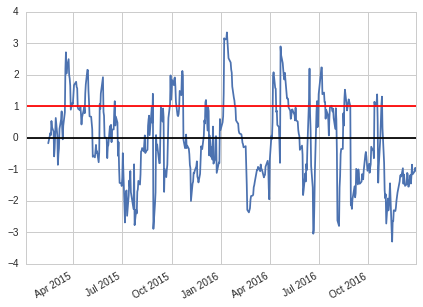

In [51]:
zscore_30.plot(figsize=(7,5))
plt.axhline(0, c='k')
plt.axhline(1, c='r')

# Backtesting the algorithm on Quantopian

In [ ]:
# This code should only run on quantopian "algorithm window"
import numpy as np

def initialize(context):   
    schedule_function(check_pairs, date_rules.every_day(), time_rules().market_close(minutes=60))
    
    context.aa = sid(45971)
    context.ual = sid(28051)
    
    context.long_on_spread = False
    context.shorting_spread = False
    
def check_pairs(context, data):
    
    aa = context.aa
    ual = context.ual
    
    prices = data.history([aa,ual], 'price', 30, '1d')
    
    short_prices = prices.iloc[-1:]  # last row: current aa ual data
    mavg_30 = np.mean(prices[aa]-prices[ual])
    std_30 = np.std(prices[aa] - prices[ual])
    
    mavg_1 = np.mean(short_prices[aa] - short_prices[ual])
    
    if std_30>0:  # means there is data available
        zscore = (mavg_1 - mavg_30)/std_30
        
        if zscore > 0.5 and not context.shorting_spread:
            # spread = AA - UAL
            order_target_percent(aa, -0.5)
            order_target_percent(ual, 0.5)
            context.shorting_spread = True
            context.long_on_spread = False
        elif zscore < 1.0 and not context.long_on_spread:
            order_target_percent(aa, 0.5)
            order_target_percent(ual, -0.5)
            context.shorting_spread = False
            context.long_on_spread = True
            
        elif abs(zscore) < 0.1:
            order_target_percent(aa, 0)
            order_target_percent(ual, 0)
            context.shorting_spread = False
            context.long_on_spread = False
            
        record(z_score = zscore)
            

### Backtesting with data from 7/4/15 to 7/26/17, while benchmark (SPY) gained 23.41%, this alogrithm lost 19.31%. Horriable !!!!###
Wild thinking for improvement: Instead of shorting, how about balance the position values according to z-score ?

# Another example using IDE: Bollinger Bands

In [ ]:
"""
It only runs in quantopian IDE.

For this simple excercise, trading only happens when stock cross the 20 day averaged Bollinger bands, 
at 100% of buying or shorting
"""
# import quantopian.algorithm as algo
# from quantopian.pipeline import Pipeline
# from quantopian.pipeline.data.builtin import USEquityPricing
# from quantopian.pipeline.filters import QTradableStocksUS
import numpy as np

def initialize(context):
    context.jj = sid(4151)
    
    schedule_function(checkbands, date_rules.every_day(), time_rules.market_close(minutes = 30))
    
    context.short = False
    context.long_on = False
    
    
def checkbands(context, data):
    cur_price = data.current(context.jj, "price")
    prices = data.history(context.jj,"price", 20, "1d")
    
    avg = prices.mean()
    std = prices.std()
    lower_band = avg - 2*std
    upper_band = avg + 2*std
    
    if cur_price <= lower_band and not context.long_on:
        order_target_percent(context.jj, 1.0)
        print("BUy")
        context.short = False
        context.long_on = True
    elif cur_price >= upper_band and not context.short:
        order_target_percent(context.jj, -1.0)
        context.short = True
        context.long_on = False
        print("shorting")
    else:
        pass
    
    record(upper = upper_band,
           lower = lower_band,
           mavg = avg,
           price = cur_price)

Backtesting with data from 7/20/2015 to 7/20/2016, while SPY gained about 9.65%, this algorithm only gained 2.93%. This is probably mainly because the model is too simple. Besides that, what else to improve it ?